In [82]:
from manim import*
from manim.utils.rate_functions import ease_in_out_cubic
import networkx as nx
_RF = '-v WARNING --disable_caching -qm'
config.media_embed = True
config.media_width = '100%'

In [215]:
class AlgorithmBanner(VGroup):
    def __init__(self, dark_theme: bool = True):
        super().__init__()

        self.font_color = "#ece6e2" if dark_theme else "#343434"
        self.a_height_over_lgorithm_height = 0.75748
        self.scale_factor = 1

        self.A = self._get_A()
        self.tree = self._get_tree()
        self.computer = self._get_computer()
        self.node = self._get_node()
        self.shapes = VGroup(*self.tree, *self.computer, *self.node)
        
        self.add(self.shapes, self.A)
        self.move_to(ORIGIN)

        self.lgorithm = self._get_lgorithm()
        self.grps = VGroup(self.lgorithm[-1], self.lgorithm[-2], self.lgorithm[-3])# 阻挡
        
        self.title = self._get_title()
        
        self.scale(0.77)
    def _get_A(self):
        A = SVGMobject(r'.\src\A.svg')
        A.set(height = 3.2)
        A.set_color(self.font_color)
        A.shift(1.725*LEFT + 0.7*UP)
        return A
    
    def _get_tree(self):
        G = nx.Graph()
        root = "ROOT"
        def get_tree(parent, num = 3):
            if num == 0:
                return 
            left_children = f"{parent}_children_1"
            right_children = f"{parent}_children_2"
            G.add_node(left_children)
            G.add_node(right_children)
            G.add_edge(parent, left_children)
            G.add_edge(parent, right_children)
            get_tree(left_children, num = num -1)
            get_tree(right_children, num = num -1)

        get_tree(root, 2)
        vertex_config = {
            node: {
                "radius": 0.45,
                # "fill_opacity":1,
                "fill_color": TEAL,
            }
            for node in G.nodes
        }
        edge_config = {
            edge: {
                "stroke_width": 7, 
                "color": MAROON
            } for edge in G.edges
        }
        g = Graph(
            list(G.nodes),
            list(G.edges),
            root_vertex = root, 
            layout = 'tree',
            vertex_config=vertex_config,
            edge_config=edge_config
        )
        
        g.scale(0.63)
        g.shift(RIGHT*2.1)
        return g
    
    def _get_computer(self):
        computer = SVGMobject(r'.\src\电脑')
        computer.set_color("#454866")
        computer[3].set_color("#e07a5f")
        computer.shift(UP*0.7+RIGHT*0.5)
        return computer
    
    def _get_node(self):
        node = SVGMobject(r'.\src\Node.svg')
        node.shift(LEFT*0.5+DOWN*0.53)
        return node
    
    def _get_lgorithm(self):
        tex = Tex(
            r"\boldmath$\mathbf{l\kern-0.05em}$",
            r"\boldmath$\mathbf{g\kern-0.05em}$",
            r"\boldmath$\mathbf{o\kern-0.05em}$",
            r"\boldmath$\mathbf{r\kern-0.05em}$",
            r"\boldmath$\mathbf{i\kern-0.05em}$",
            r"\boldmath$\mathbf{t\kern-0.05em}$",
            r"\boldmath$\mathbf{h\kern-0.05em}$",
            r"\boldmath$\mathbf{m\kern-0.05em}$",
            tex_template = TexTemplateLibrary.ctex
        ).set(height = self.a_height_over_lgorithm_height*self.A.height)
        tex.align_to(self.A, DOWN).next_to(self.A, RIGHT, buff = 0.05).shift(DOWN*0.25)
        tex.set_fill(color = self.font_color, opacity=1)     
        return tex
    def _get_title(self):
        title = Tex(
            r"\textbf{巷北}",
            tex_template = TexTemplateLibrary.ctex
        ).set_color_by_gradient([BLUE_A,BLUE, GREEN,GRAY_BROWN]).scale(2)
        pointer = SVGMobject(r'.\src\指针.svg').next_to(title,LEFT, buff = -0.25).scale(0.4)
        pointer.set_color(self.font_color)
        grps = VGroup(pointer, title)
        grps.scale(1.4)
        grps.move_to(ORIGIN)
        grps.shift(UP*2.4)
        return grps
    
    @override_animation(Create)
    def create(self, run_time = 2) -> AnimationGroup:

        return AnimationGroup(
            SpiralIn(self.shapes, run_time = run_time),
            FadeIn(self.A, run_time = run_time / 2),
            lag_ratio = 0.1
        )
    
    def scale(self, scale_factor:float, **kwargs):
        self.scale_factor *= scale_factor
        if self.lgorithm not in self.submobjects:
            self.lgorithm.scale(scale_factor, **kwargs)
        if self.title not in self.submobjects:
            self.title.scale(scale_factor, **kwargs)
        return super().scale(scale_factor, **kwargs)
    
    def expand(self, run_time: float = 2, has_title = True) -> Succession:    

        run_time = 2 if has_title else 1.5

        A_shape_offset = 11 * self.scale_factor
        shape_sliding_overshoot = 0.8 * self.scale_factor

        self.lgorithm.next_to(self.A, buff = 0.06).align_to(self.A, DOWN)
        self.lgorithm.set_opacity(0)
        self.shapes.save_state()
        m_clone = self.lgorithm[-1].copy()
        h_clone = self.lgorithm[-2].copy()
        t_clone = self.lgorithm[-3].copy()
        grps = VGroup(m_clone, h_clone, t_clone)
        grps.set_opacity(0)
        self.add(grps)
        grps.move_to(self.shapes)
        # m_clone.shift(LEFT*0.7)

        self.A.save_state()
        left_group = VGroup(self.A, self.lgorithm, grps)

        def shift(vector):
            self.shapes.restore()
            left_group.align_to(self.A.saved_state, LEFT)
            self.shapes.shift(vector / 2)
            left_group.shift(-vector / 2)

        
        def slide_and_uncover(mob, alpha):
            shift(alpha * (A_shape_offset + shape_sliding_overshoot) * RIGHT)

            for letter in mob.lgorithm:
                if mob.computer.get_center()[0] > letter.get_center()[0]:
                    letter.set_opacity(1)
                    self.add_to_back(letter)

            if alpha == 1:
                self.remove(*[self.lgorithm])
                self.add_to_back(self.lgorithm)
                # mob.shapes.set_z_index(0)
                mob.shapes.save_state()
                mob.A.save_state()

        def slide_back(mob, alpha):
            if alpha == 0:
                grps.set_opacity(1)
                grps.move_to(mob.grps)
                mob.lgorithm.set_opacity(1)

            shift(alpha * shape_sliding_overshoot * LEFT*7)

            if alpha == 1:
                mob.remove(grps)
                mob.add_to_back(mob.shapes)
            
        return Succession(
            UpdateFromAlphaFunc(
                self,
                slide_and_uncover,
                run_time = run_time * 2 / 4,
                rate_func = ease_in_out_cubic,
            ),
            UpdateFromAlphaFunc(
                self,
                slide_back,
                run_time = run_time * 1 / 4,
                rate_func = smooth,
            ),
            FadeIn(
                self.title,
                run_time = run_time * 1 / 4,
                rate_func = smooth
            )
        ) if has_title else Succession(
            UpdateFromAlphaFunc(
                self,
                slide_and_uncover,
                run_time = run_time * 2 / 3,
                rate_func = ease_in_out_cubic,
            ),
            UpdateFromAlphaFunc(
                self,
                slide_back,
                run_time = run_time * 1 / 3,
                rate_func = smooth,
            ),
        )
                
        

In [ ]:
config.background_color = BLACK
class Test(Scene):
    def construct(self):
        a = AlgorithmBanner(dark_theme=True)
        self.play(Create(a))
        self.wait()
        self.play(a.expand())
        self.wait(3)
%manim $_RF Test

Manim Community v0.19.0

In [ ]:
class Test(Scene):
    def construct(self):
        v = ManimBanner(dark_theme=False)
        self.play(Create(v))
        self.play(v.expand())
        Graph().vertices
%manim $_RF Test

Manim Community v0.19.0

Manim Community v0.19.0

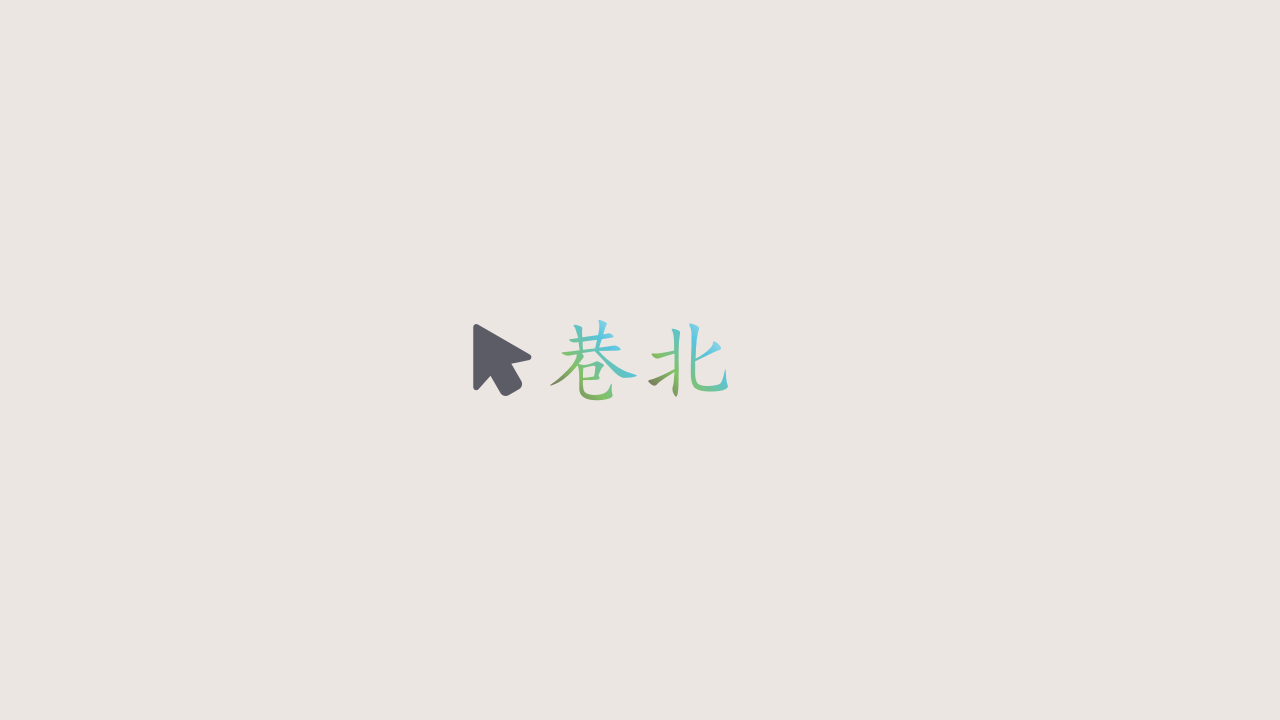

In [190]:
class Test(Scene):
    def construct(self):
        # tex = Tex(r"\boldmath$\mathbf{l\kern-0.05em g\kern-0.05em o\kern-0.05em r\kern-0.05em i\kern-0.05em t\kern-0.05em h\kern-0.05em m}$", tex_template = TexTemplateLibrary.ctex)
        tex = Tex(
            r"\textbf{巷北}",
            tex_template = TexTemplateLibrary.ctex
        ).set_color_by_gradient([BLUE_A,BLUE, GREEN,GRAY_BROWN]).scale(2)
        svg = SVGMobject(r'.\src\指针.svg').next_to(tex,LEFT, buff = -0.25).scale(0.4)
        self.add(tex, svg)
%manim $_RF Test

In [161]:
class ZIndexTest(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        square.set_z_index(1)
        circle.set_z_index(2)
        self.add(circle, square)
        self.wait(1)

        # 打印所有对象的 Z 索引
        print([mobj.z_index for mobj in self.mobjects])
%manim $_RF ZIndexTest

Manim Community v0.19.0

[2, 1, 0]
